In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from xgboost import XGBClassifier
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten,LSTM
from keras.models import Sequential
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
%matplotlib inline
accuracies={}
roc=[]

# Word2Vec Models

Neural Network

In [5]:
X_train=pd.read_csv('word2vec_train.csv')
X_test=pd.read_csv('word2vec_test.csv')
X_train.drop('Unnamed: 0',axis=1,inplace=True)
X_test.drop('Unnamed: 0',axis=1,inplace=True)
y_train=pd.read_csv('y_train.csv')
y_train=np.array([int(i) for i in y_train['toxic']])
y_test=pd.read_csv('y_test.csv')
y_test=np.array([int(i) for i in y_test['toxic']])

In [6]:
import keras
nn_model_word2vec= keras.Sequential([
    keras.layers.Flatten(input_shape=(200,)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
   
])
nn_model_word2vec.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [7]:
nn_model_word2vec.fit(X_train,y_train,batch_size=32,epochs=5,verbose=1,validation_data=(X_test,y_test))

Epoch 1/5
1131/1131 [==============================] - 8s 6ms/step - loss: 0.3303 - accuracy: 0.8580 - val_loss: 0.8020 - val_accuracy: 0.7564
Epoch 2/5
1131/1131 [==============================] - 7s 6ms/step - loss: 0.2605 - accuracy: 0.8923 - val_loss: 0.7310 - val_accuracy: 0.7635
Epoch 3/5
1131/1131 [==============================] - 7s 6ms/step - loss: 0.2413 - accuracy: 0.8999 - val_loss: 0.6961 - val_accuracy: 0.7427
Epoch 4/5
1131/1131 [==============================] - 7s 7ms/step - loss: 0.2357 - accuracy: 0.9017 - val_loss: 0.8604 - val_accuracy: 0.7495
Epoch 5/5
1131/1131 [==============================] - 7s 6ms/step - loss: 0.2230 - accuracy: 0.9066 - val_loss: 0.7608 - val_accuracy: 0.7456


In [10]:
from sklearn.metrics import roc_curve
l=np.array(nn_model_word2vec.predict(X_test))
pred=[]
for i in l:
    if i>0.75:
        pred.append(1)
    else:
        pred.append(0)
accuracies['Word2vec Neural Network']=accuracy_score(y_test,pred)
fpr,tpr , _ = roc_curve(y_test, pred)
roc.append([fpr,tpr,'Word2vec Neural Network'])

Random-Forest

In [11]:
rfc_word2vec = RandomForestClassifier(n_estimators=100)
rfc_word2vec.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
rfc_pred_word2vec = rfc_word2vec.predict(X_test)

In [13]:
print(classification_report(y_test,rfc_pred_word2vec))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2000
           1       0.69      0.57      0.62      1066

    accuracy                           0.76      3066
   macro avg       0.74      0.71      0.72      3066
weighted avg       0.75      0.76      0.75      3066



In [14]:
accuracies['Word2vec Random Forest']=accuracy_score(y_test,rfc_pred_word2vec)

In [15]:
fpr,tpr , _ = roc_curve(y_test,rfc_pred_word2vec )
roc.append([fpr,tpr,'Random Forest'])

XG BOOST

In [16]:
xgb_word2vec=XGBClassifier()

In [17]:
xgb_word2vec.fit(X_train, y_train)

C:\Users\Aryan\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
xgb_predictions_word2vec=xgb_word2vec.predict(X_test)

C:\Users\Aryan\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [19]:
print(classification_report(y_test,xgb_predictions_word2vec))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2000
           1       0.68      0.56      0.62      1066

    accuracy                           0.76      3066
   macro avg       0.73      0.71      0.72      3066
weighted avg       0.75      0.76      0.75      3066



In [21]:
accuracies['Word2vec XGBoost']=accuracy_score(y_test,xgb_predictions_word2vec)

In [22]:
fpr,tpr , _ = roc_curve(y_test,xgb_predictions_word2vec)
roc.append([fpr,tpr,'Word2Vec XGBoost'])

SVM

In [23]:
svm_model = SVC()

In [24]:
svm_model_word2vec = SVC()
svm_model_word2vec.fit(X_train,y_train)
svm_predictions_word2vec = svm_model_word2vec.predict(X_test)

In [25]:
print(classification_report(y_test,svm_predictions_word2vec))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      2000
           1       0.67      0.54      0.60      1066

    accuracy                           0.75      3066
   macro avg       0.73      0.70      0.71      3066
weighted avg       0.74      0.75      0.74      3066



In [27]:
accuracies['Word2vec SVM']=accuracy_score(y_test,svm_predictions_word2vec)

In [28]:
fpr,tpr , _ = roc_curve(y_test,svm_predictions_word2vec)
roc.append([fpr,tpr,'Word2vec SVM'])

In [29]:
x=accuracies.keys()
y=accuracies.values()

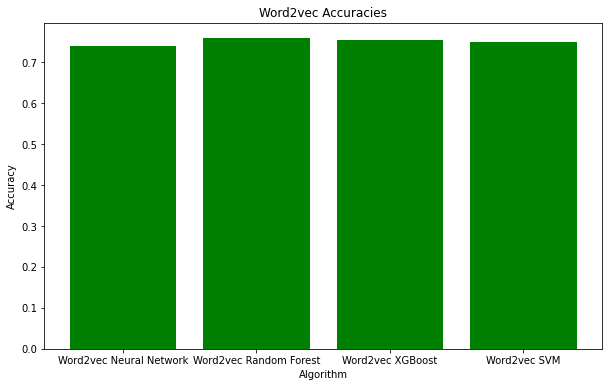

In [30]:
fig=plt.figure(figsize=(10,6))
plt.title('Accuracy Comparision')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Word2vec Accuracies')
plt.bar(x,y,color='green')
plt.show()

In [31]:
from sklearn.metrics import roc_curve

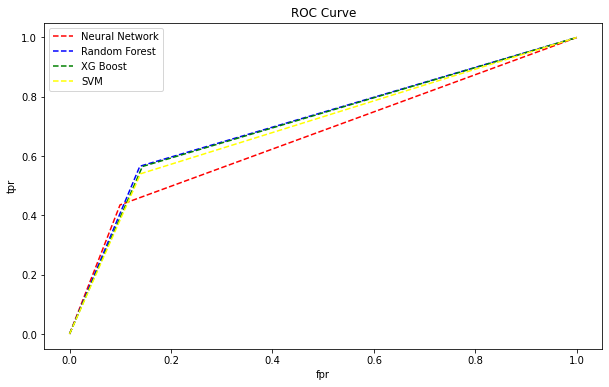

In [32]:
fig=plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(roc[0][0], roc[0][1], linestyle='--',color='red',label='Neural Network')
plt.plot(roc[1][0], roc[1][1], linestyle='--',color='blue',label='Random Forest')
plt.plot(roc[2][0], roc[2][1], linestyle='--',color='green',label='XG Boost')
plt.plot(roc[3][0], roc[3][1], linestyle='--',color='yellow',label='SVM')
plt.legend()
plt.show()

In [35]:
import joblib
joblib.dump(xgb_word2vec,'xgboostmodel.sav')

['xgboostmodel.sav']

In [38]:
joblib.dump(rfc_word2vec,'rfmodel.sav')

['rfmodel.sav']